In [2]:
import matplotlib.pyplot as plt
from keras import datasets, layers, models

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

MNIST stands for Modified National Institute of Standards and Technology, which is a dataset of handwritten digits used for training and testing image processing systems.

The MNIST dataset is a collection of 70,000 handwritten digits (0-9) images, with 60,000 images for training and 10,000 images for testing. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding digit class. The MNIST dataset is commonly used as a benchmark dataset for image classification tasks in machine learning and computer vision.

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

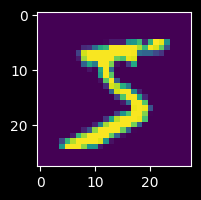

In [8]:
plt.figure(figsize=(15, 2))
plt.imshow(X_train[0])

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(3000, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(10, activation="sigmoid"),
    ]
)

2023-07-31 10:29:43.658410: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-07-31 10:29:43.658435: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-07-31 10:29:43.658454: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-07-31 10:29:43.658638: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-31 10:29:43.658946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
ann.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [12]:
ann.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


2023-07-31 10:29:44.777482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 26s 14ms/step - loss: 132.6989 - accuracy: 0.7722
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 613.3015 - accuracy: 0.7905
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 1197.0818 - accuracy: 0.7981
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 2036.1945 - accuracy: 0.7975
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 2924.1294 - accuracy: 0.8027


In [13]:
ann.evaluate(X_test, y_test)

 14/313 [>.............................] - ETA: 2s - loss: 2275.8130 - accuracy: 0.8147

2023-07-31 10:31:51.388895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 2319.1165 - accuracy: 0.8390


[2319.116455078125, 0.8389999866485596]

In [14]:
y_pred = ann.predict(X_test)

 48/313 [===>..........................] - ETA: 0s

2023-07-31 10:31:53.594021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


In [16]:
cnn = models.Sequential(
    [
        layers.Conv2D(
            filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [17]:
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [18]:
cnn.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


2023-07-31 10:34:37.857371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 20s 10ms/step - loss: 0.1481 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0661 - accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0653 - accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1028 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1851 - accuracy: 0.9817


In [19]:
cnn.evaluate(X_test, y_test)

 17/313 [>.............................] - ETA: 1s - loss: 0.2997 - accuracy: 0.9724   

2023-07-31 10:36:52.693206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.3263 - accuracy: 0.9788


[0.3263379633426666, 0.9787999987602234]